In [2]:
import os
os.getcwd()
os.chdir('D:\python\ML')
os.getcwd()


'D:\\python\\ML'

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', 200) 

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header = None)
data.columns = ['label', 'body_text']


In [5]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()


,label,body_text,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [6]:
import string


In [7]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    ratio = count/(len(text) - text.count(" "))
    return round(ratio, 4)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,160,2.50
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,128,4.69
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.08
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.23
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.14


In [8]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline


In [13]:
data[data['label']=="spam"]['body_len']

1       128
6       132
7       126
9       111
10      130
       ... 
5533     75
5536    126
5543    133
5562    120
5563    131
Name: body_len, Length: 746, dtype: int64

In [18]:
bins=np.linspace(0,200,20)

In [27]:
#pyplot.hist(data[data['label']=="spam"]['body_len'],bins,alpha=0.5,normed=True,Label='spam')

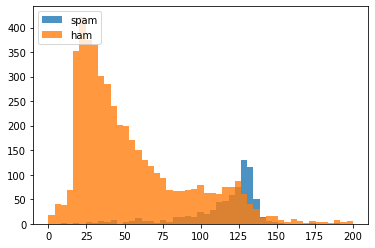

In [28]:
pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.8, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins,  alpha=0.8, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()


D:\anconda\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anconda\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


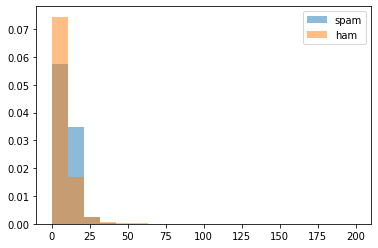

In [30]:
bins = np.linspace(0,200,20)

pyplot.hist(data[data['label']=='spam']['punct%']*2, bins, alpha=.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=.5, normed=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()
